In [130]:
#import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
#Load all databases
df_ratings = pd.read_csv("../data/ratings.csv")
df_movies = pd.read_csv("../data/movies.csv", index_col = 0)
df_tags = pd.read_csv("../data/tags.csv")
df_links = pd.read_csv("../data/links.csv")
df_genometags = pd.read_csv("../data/genome-tags.csv", index_col = 0)
df_genome_scores = pd.read_csv("../data/genome-scores.csv")

In [3]:
df_ratings

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580
...,...,...,...,...
20000258,138493,68954,4.5,1258126920
20000259,138493,69526,4.5,1259865108
20000260,138493,69644,3.0,1260209457
20000261,138493,70286,5.0,1258126944


In [4]:
ratings = []
for movie in df_movies.index:
    rating = df_ratings.loc[df_ratings["movieId"] == movie]["rating"].mean()
    ratings.append(rating)
df_movies["avg_rating"] = ratings


In [5]:
df_movies.head(30)

,title,genres,avg_rating
movieId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240
2,Jumanji (1995),Adventure|Children|Fantasy,3.211977
3,Grumpier Old Men (1995),Comedy|Romance,3.151040
4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393
5,Father of the Bride Part II (1995),Comedy,3.064592
6,Heat (1995),Action|Crime|Thriller,3.834930
7,Sabrina (1995),Comedy|Romance,3.366484
8,Tom and Huck (1995),Adventure|Children,3.142049
9,Sudden Death (1995),Action,3.004924


In [110]:
movie_ranking = df_movies.sort_values("avg_rating", ascending = False)
movie_ranking

,title,genres,avg_rating
movieId,,,
95517,"Barchester Chronicles, The (1982)",[Drama],5.0
105846,Only Daughter (2013),[Drama],5.0
89133,Boys (Drenge) (1977),[Drama],5.0
105187,Linotype: The Film (2012),[Documentary],5.0
105191,Rocaterrania (2009),"[Documentary, Fantasy]",5.0
...,...,...,...
128886,Love at the Top (1974),"[Comedy, Drama]",NaN
129201,The Time Being (2012),[Mystery],NaN
129443,Thank You a Lot (2014),[Drama],NaN


In [79]:
def show_na(df):
    na_columns = df.isna().any(axis = 0)
    na_rows = df.isna().any(axis = 1)
    columns_nbna = df.isna().sum(axis = 0)
    print("Empty columns", na_columns.sum(), "of ", len(df.columns), "%:", na_columns.sum()/len(df.columns), "%", "\n", na_columns)
    print("Empty rows", na_rows.sum(), "of", len(df), "%:",  f"{(na_rows.sum()/len(df)):.5f}", "%")

In [80]:
show_na(df_movies)

Empty columns 1 of  3 %: 0.3333333333333333 % 
 title         False
genres        False
avg_rating     True
dtype: bool
Empty rows 534 of 27278 %: 0.01958 %


# Genome Tag Graph

In [450]:
movies_with_genomes

,movieId,title,genres,avg_rating,overall_genomescores
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.921240,180.73100
1128,2,Jumanji (1995),Adventure|Children|Fantasy,3.211977,134.78025
2256,3,Grumpier Old Men (1995),Comedy|Romance,3.151040,104.23100
3384,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.861393,96.36150
4512,5,Father of the Bride Part II (1995),Comedy,3.064592,111.50625
...,...,...,...,...,...
11704128,130578,The Gunman (2015),Action|Thriller,3.000000,69.40650
11705256,130840,Spring (2015),Horror|Romance|Sci-Fi,3.500000,136.69300
11706384,131013,Get Hard (2015),Comedy,2.500000,109.56900
11707512,131168,Phoenix (2014),Drama,3.500000,154.19225


In [171]:
movie_genomescores = pd.merge(df_movies, df_genome_scores, on = "movieId")
movie_genomescores["genome_tag"] = movie_genomescores["tagId"].map(df_genometags["tag"])
genomescore_sums = movie_genomescores.groupby("genome_tag")["relevance"].sum().sort_values(ascending = False)
movie_genomescores = movie_genomescores.merge(genomescore_sums, on = "genome_tag")
movie_genomescores.rename({"relevance_x" : "inv_relevance", "relevance_y" : "relevance_sum"}, axis = 1,  inplace = True)
movie_genomescores

,movieId,title,genres,avg_rating,tagId,inv_relevance,genome_tag,relevance_sum
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.92124,1,0.02500,007,476.84675
1,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.92124,2,0.02500,007 (series),472.87075
2,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.92124,3,0.05775,18th century,720.49675
3,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.92124,4,0.09675,1920s,891.07825
4,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.92124,5,0.14675,1930s,1427.41250
...,...,...,...,...,...,...,...,...
11709763,131170,Parallels (2015),[Sci-Fi],3.50000,1124,0.58775,writing,945.36900
11709764,131170,Parallels (2015),[Sci-Fi],3.50000,1125,0.01075,wuxia,429.89275
11709765,131170,Parallels (2015),[Sci-Fi],3.50000,1126,0.01575,wwii,468.35225
11709766,131170,Parallels (2015),[Sci-Fi],3.50000,1127,0.11450,zombie,1154.24600


In [157]:
movies_with_genomes = movie_genomescores.drop_duplicates(subset=["movieId"])
movies_with_genomes.drop(["tagId", "inv_relevance", "genome_tag", "relevance_sum"], axis = 1, inplace = True)

In [158]:
#for i, tag in genome_tags.iterrows():
overall_genomescore = []
for j, movie in movies_with_genomes.iterrows():
    sum = movie_genomescores.loc[movie_genomescores["movieId"] == movie["movieId"]]["inv_relevance"].sum()
    overall_genomescore.append(sum)
movies_with_genomes["overall_genomescores"] = overall_genomescore


In [409]:
movies_with_genomes["avg_rating"].sum()

33849.582297801215

In [194]:
df_genometags = df_genometags.rename({"tag" : "genome_tag"}, axis = 1)
df_genometags = df_genometags.merge(genomescore_sums, on = "genome_tag")
df_genometags = df_genometags.rename({"relevance" : "relevance_sum"}, axis = 1)

In [333]:
df_genometags["relevance_sum"].sum()

1363992.6214999994

In [200]:
movie_genomescores = movie_genomescores.merge(movies_with_genomes[["movieId", "overall_genomescores"]], on="movieId")

In [513]:
movie_genomescores.avg_rating.describe()

count    1.169736e+07
mean     3.264183e+00
std      5.099653e-01
min      8.373206e-01
25%      2.960177e+00
50%      3.339254e+00
75%      3.645604e+00
max      4.500000e+00
Name: avg_rating, dtype: float64

In [252]:
#movie_genomescores["genome_effect_on_rating"] = (movie_genomescores["inv_relevance"] / movie_genomescores["overall_genomescores"]) *movie_genomescores["avg_rating"]
movie_genomescores["genome_effect_on_rating"] = (movie_genomescores["inv_relevance"]/ movie_genomescores["overall_genomescores"]) * movie_genomescores["avg_rating"]

In [400]:
def normalize_col(col):
    return (col - min(col)) / ( max(col) - min(col) )

In [510]:
genome_rating = movie_genomescores.groupby(["genome_tag","relevance_sum"])["genome_effect_on_rating"].sum().reset_index(name =  'rating_amount')
#genome_rating["relevance_sum"] = normalize_col(genome_rating["relevance_sum"])
sum1 = genome_rating["relevance_sum"].sum()
sum2 = genome_rating.rating_amount.sum()
a = 33849.582297801215
b = 1128 
c = 10381 
genome_rating["avg_rating"] =  ((genome_rating["rating_amount"] / genome_rating["relevance_sum"] ) * a)/b *5

In [330]:
genome_rating.rating_amount.sum()

33849.582297801215

In [284]:
genome_rating = genome_rating /5

In [511]:
genome_rating 

,genome_tag,relevance_sum,rating_amount,avg_rating
0,007,476.84675,11.894179,3.742569
1,007 (series),472.87075,11.895787,3.774548
2,18th century,720.49675,18.601979,3.873837
3,1920s,891.07825,22.681528,3.819185
4,1930s,1427.41250,36.040241,3.788370
...,...,...,...,...
1123,writing,945.36900,23.701692,3.761770
1124,wuxia,429.89275,10.831632,3.780489
1125,wwii,468.35225,11.489801,3.680901
1126,zombie,1154.24600,28.837437,3.748629


In [477]:
test = movie_genomescores.loc[movie_genomescores["movieId"] == 1]

In [254]:
test["genome_effect_on_rating"].sum()

3.921239561324077

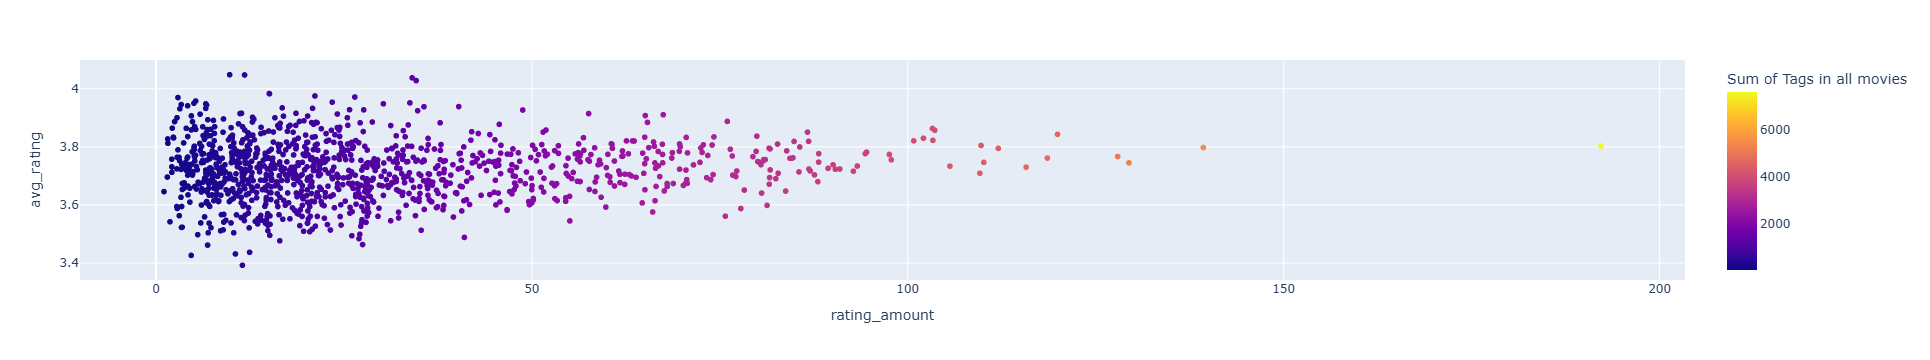

In [515]:
fig = px.scatter(genome_rating, y = "avg_rating", x = "rating_amount", color = "relevance_sum", color_discrete_sequence=px.colors.qualitative.Dark24, hover_data=["genome_tag"], labels = {"tag_id" : "Genome Tag",
                                                                                                                                                                                                          "relevance_sum" : "Sum of Tags in all movies"})
fig.show()

The graph shows the overall rate of genome tag usage, aka the higher the X-axis value, the more relevant the tag has been classified for the sum of all movies.


# Data for Movie Genres

In [45]:
temp_df = pd.read_csv("../data/movies.csv", index_col = 0)
df_movies['genres'] = temp_df['genres'].str.split('|')

all_genres = temp_df["genres"].str.split(
    '|', expand=True).stack().reset_index(drop=True)

all_genres = all_genres.unique()

In [51]:
df_movies

,title,genres,avg_rating
movieId,,,
1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",3.921240
2,Jumanji (1995),"[Adventure, Children, Fantasy]",3.211977
3,Grumpier Old Men (1995),"[Comedy, Romance]",3.151040
4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",2.861393
5,Father of the Bride Part II (1995),[Comedy],3.064592
...,...,...,...
131254,Kein Bund für's Leben (2007),[Comedy],4.000000
131256,"Feuer, Eis & Dosenbier (2002)",[Comedy],4.000000
131258,The Pirates (2014),[Adventure],2.500000


In [85]:
genre_ratings = []
for genre in all_genres:
    overall_rating = 0
    rating_num = 0
    for i, row in df_movies.iterrows():
        if genre in row["genres"]:
            if(row["avg_rating"] > 0):
                overall_rating += row["avg_rating"]
                rating_num += 1
    overall_rating = overall_rating / rating_num
    genre_ratings.append(overall_rating)

           

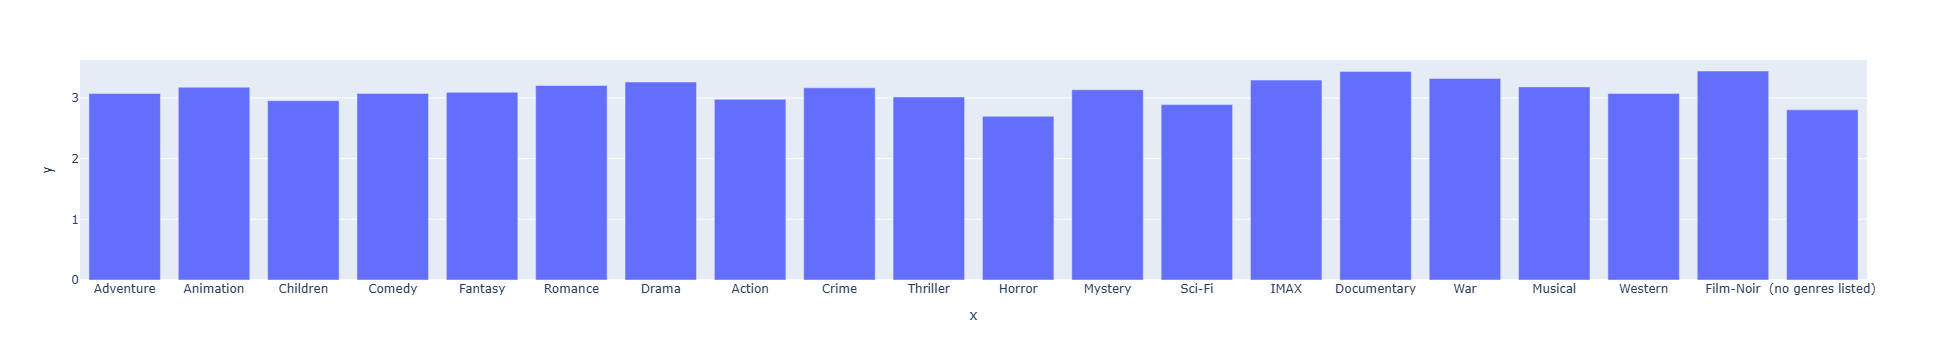

In [88]:
fig = px.bar(x = all_genres, y = genre_ratings)
fig.show()

# Data for specific User

In [6]:
#Loading Data for User with ID 1 and sorting by rating
movies_user1 = df_ratings.loc[df_ratings["userId"] == 1]
movies_user1.sort_values("rating", ascending=False, inplace=True)
#Making the df more readable, adding movie titles and making timestamp human readable
movies_user1["Title"] = movies_user1["movieId"].map(df_movies["title"])
movies_user1.rename({"timestamp" : "Date"}, inplace = True, axis = 1) 
movies_user1["Date"] = pd.to_datetime(movies_user1["Date"], unit = "s")

C:\Users\birne\AppData\Local\Temp\ipykernel_30868\1631833583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_user1.sort_values("rating", ascending=False, inplace=True)
C:\Users\birne\AppData\Local\Temp\ipykernel_30868\1631833583.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_user1["Title"] = movies_user1["movieId"].map(df_movies["title"])
C:\Users\birne\AppData\Local\Temp\ipykernel_30868\1631833583.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

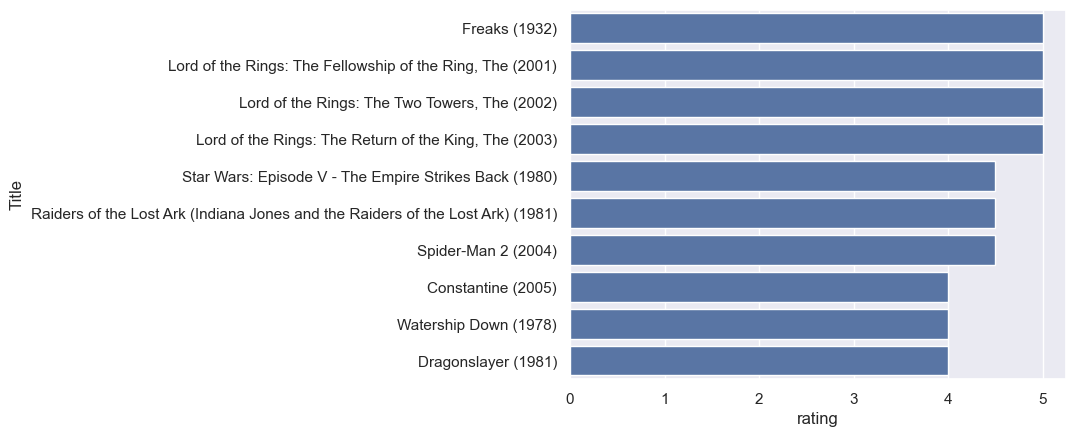

In [7]:
#show top ten movies for user Nr. 1, to get a general idea of their taste
sns.barplot(y = "Title", x = "rating", data = movies_user1.head(10))
plt.show()

## Genome Score per User

In [31]:
user_genomescores = pd.merge(movies_user1, df_genome_scores, on = "movieId")
user_genomescores["genome_tag"] = user_genomescores["tagId"].map(df_genometags["tag"])
genomescore_sums = user_genomescores.groupby("genome_tag")["relevance"].sum().sort_values(ascending = False)
user_genomescores = user_genomescores.merge(genomescore_sums, on = "genome_tag")
user_genomescores.rename({"relevance_x" : "inv_relevance", "relevance_y" : "relevance_sum"}, axis = 1,  inplace = True)

In [36]:
#genome_tastes = user_genomescores.drop_duplicates(subset=["genome_tag"])

genome_tastes

,userId,movieId,rating,Date,Title,tagId,inv_relevance,genome_tag,relevance_sum
0,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),1,0.02525,007,8.85650
1,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),2,0.02425,007 (series),7.13100
2,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),3,0.03750,18th century,16.98200
3,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),4,0.16400,1920s,19.24375
4,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),5,0.65450,1930s,28.20525
...,...,...,...,...,...,...,...,...,...
1123,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),1124,0.07775,writing,16.61725
1124,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),1125,0.03600,wuxia,11.30200
1125,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),1126,0.01225,wwii,6.93200
1126,1,8507,5.0,2004-09-10 03:13:47,Freaks (1932),1127,0.25275,zombie,25.01225


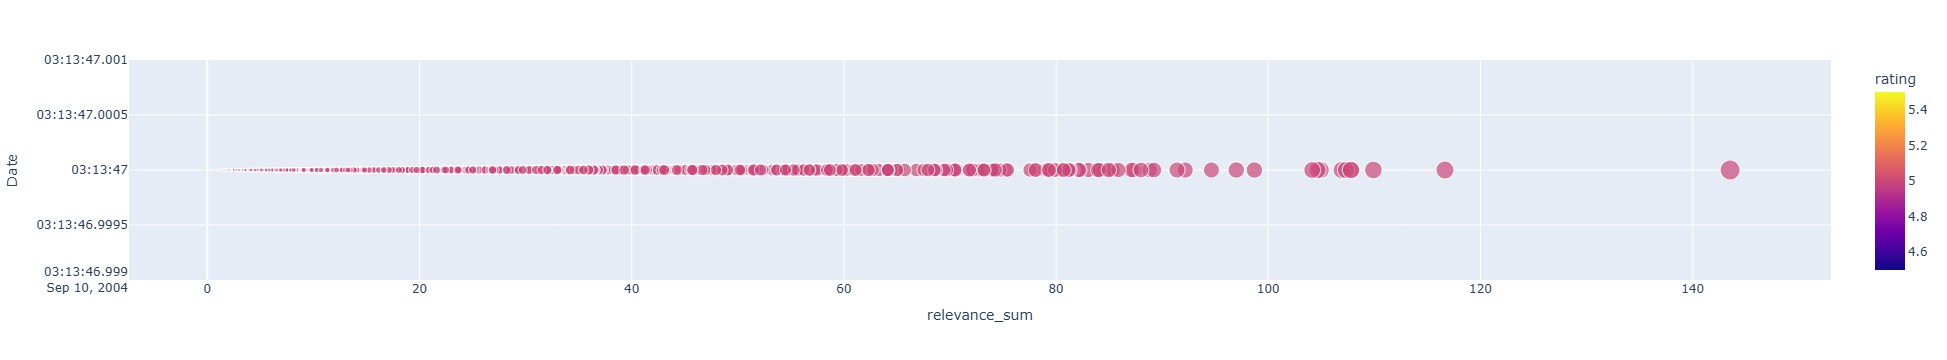

In [38]:
fig = px.scatter(genome_tastes, x = "relevance_sum", y = "Date", color = "rating", size = "relevance_sum", color_discrete_sequence=px.colors.qualitative.Dark24, hover_data=["genome_tag"])
fig.show()

ValueError: array length 1128 does not match index length 196272